In [1]:
import joblib
X_train_sm, X_val, X_test, y_train_sm, y_val, y_test = joblib.load('split_data.pkl')

In [2]:
print(f"Training dataset shape:{X_train_sm.shape, y_train_sm.shape}")
print(f"Validation dataset shape:{X_val.shape, y_val.shape}")
print(f"Testing dataset shape:{X_test.shape, y_test.shape}")

Training dataset shape:((12856, 6), (12856,))
Validation dataset shape:((1414, 6), (1414,))
Testing dataset shape:((1414, 6), (1414,))


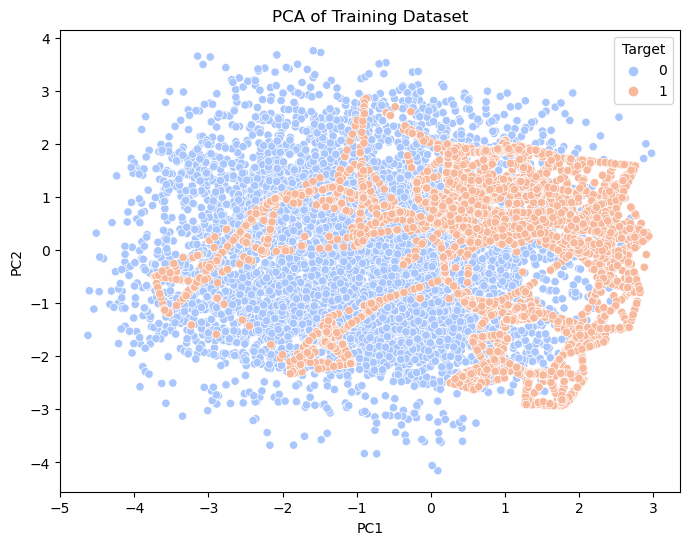

In [3]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

#Transforming 6 dimensional features to 2 dimensional PCA
pca =PCA(n_components = 2)
X_pca = pca.fit_transform(X_train_sm)

pca_df = pd.DataFrame(data = X_pca, columns = ['PC1', 'PC2'])
pca_df['Target'] = y_train_sm

plt.figure(figsize = (8,6))
sns.scatterplot( x = 'PC1', y = 'PC2', hue = 'Target', data = pca_df, palette = 'coolwarm')
plt.title('PCA of Training Dataset')
plt.show()

In [4]:
from sklearn.svm import SVC

#creating and training SVM model
svm_model = SVC(kernel = 'rbf', random_state = 42)
svm_model.fit(X_train_sm, y_train_sm)
svm_model.get_params()

{'C': 1.0,
 'break_ties': False,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 'scale',
 'kernel': 'rbf',
 'max_iter': -1,
 'probability': False,
 'random_state': 42,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

In [5]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, mean_squared_error

#Evaluating the initial SVM model using validation set
y_val_pred = svm_model.predict(X_val)
accuracy_inl = accuracy_score(y_val, y_val_pred)
precision_inl = precision_score(y_val, y_val_pred)
recall_inl = recall_score(y_val, y_val_pred)
f1_inl = f1_score(y_val, y_val_pred)
mse_inl = mean_squared_error(y_val, y_val_pred)
confmx_inl = confusion_matrix(y_val, y_val_pred)

print("Initial Model Evaluation")
print(f"Accuracy:{accuracy_inl}")
print(f"Precision:{precision_inl}")
print(f"Recall:{recall_inl}")
print(f"F1-Score:{f1_inl}")
print(f"MSE:{mse_inl}")
print(f"Confusion Matrix:\n{confmx_inl}")

Initial Model Evaluation
Accuracy:0.9101838755304101
Precision:0.22580645161290322
Recall:0.8333333333333334
F1-Score:0.3553299492385787
MSE:0.08981612446958982
Confusion Matrix:
[[1252  120]
 [   7   35]]


In [ ]:
from sklearn.model_selection import GridSearchCV, cross_val_score

#Hyperparamter initalizing
param_grid = {
    'C': [0.1, 1, 10, 100, 1000],          
    'gamma': [1,0.1, 0.01, 0.001, 0.0001],
    'kernel': [ 'rbf'],
    }

#Finding the best parameter combination for best model and fitting the model               
grid_search = GridSearchCV( estimator = SVC(random_state = 42), param_grid = param_grid, verbose = 2, n_jobs = -1)
grid_search.fit(X_train_sm, y_train_sm)

best_svm_model = grid_search.best_estimator_
joblib.dump(best_svm_model, 'svm_best_model.pkl')

print("Best parameter found:")
print(grid_search.best_params_)


Fitting 5 folds for each of 25 candidates, totalling 125 fits


In [ ]:
#Evaluating the initial SVM model using validation set
y_val_pred = best_svm_model.predict(X_val)
accuracy = accuracy_score(y_val, y_val_pred)
precision = precision_score(y_val, y_val_pred)
recall = recall_score(y_val, y_val_pred)
f1 = f1_score(y_val, y_val_pred)
mse = mean_squared_error(y_val, y_val_pred)
confm = confusion_matrix(y_val, y_val_pred)

print("Optimized Model Evaluation")
print(f"Accuracy:{accuracy}")
print(f"Precision:{precision}")
print(f"Recall:{recall}")
print(f"F1-Score:{f1}")
print(f"MSE:{mse}")
print(f"Confusion Matrix:\n{confm}")

In [ ]:
from sklearn.metrics import accuracy_score

# Calculate accuracy of the model on the test set
y_test_pred = best_svm_model.predict(X_test)
accuracy_test = accuracy_score(y_test, y_test_pred)

# Print the final model accuracy on the test set
print(f"Final model accuracy on test set: {accuracy_test}")